In [1]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df1 = pd.read_csv("data/Fake.csv")
df2 = pd.read_csv("data/True.csv")

In [3]:
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df1['class'] = "fake"
df2['class'] = "true"

In [7]:
combine_df = pd.concat([df1,df2])
combine_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [5]:
# from glob import glob
# pop_files = sorted(glob("data/*.csv"))
# pop_files

['data/Fake.csv', 'data/True.csv']

In [7]:
# combine_df = pd.concat((pd.read_csv(file).assign(label=file) 
#                        for file in pop_files),ignore_index=True)
# combine_df = combine_df.replace("data/Fake.csv","fake")
# combine_df = combine_df.replace("data/True.csv","true")
# combine_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#  Remove punctuation

In [11]:
# string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
# def remove_punct(text):
#     text_nopunct = "".join([char for char in text if char not in string.punctuation])
#     return text_nopunct

# combine_df["clean_text"] = combine_df["text"].apply(lambda x:remove_punct(x))

# combine_df.head()

,title,text,subject,date,Label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,On Friday it was revealed that former Milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,On Christmas day Donald Trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,Pope Francis used his annual Christmas Day mes...


# Tokenization

In [8]:
def tokeniz(text):
    token = re.split('\W+', text)
    return token
clean_df = combine_df
clean_df["token_text"] = clean_df["text"].apply(lambda x:tokeniz(x.lower()))

clean_df.head()

,title,text,subject,date,class,token_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ..."


# Remove stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/miro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stopword = nltk.corpus.stopwords.words('english')

In [11]:
def remove_stopword(token):
    text = [word for word in token if word not in stopword]
    return text

clean_df["nostopword_text"] = clean_df["token_text"].apply(lambda x:remove_stopword(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


# Lemmatizing

In [12]:
from nltk.stem import WordNetLemmatizer

In [13]:
wl = WordNetLemmatizer()

In [14]:
def lemmatizing(stopword):
    text = [wl.lemmatize(word) for word in stopword]
    return text

clean_df["lemmatizing_text"] = clean_df["nostopword_text"].apply(lambda x:lemmatizing(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text,lemmatizing_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [15]:
clean_df.to_csv("data/clean_data.csv")

# N-Grams

In [32]:
# from collections import Counter

In [52]:
fake_df = clean_df[(clean_df["class"] == "fake")]
# fake = fake_df["text"]
true_df = clean_df[(clean_df["class"] == "true")]
# true = true_df["text"]

In [16]:
# bigrams_true = (true, true[1:])
# bigram_counts_true = Counter(bigrams_true)
# bigrams_true = pd.DataFrame(bigram_counts_true.most_common(20), columns=["Bigram", "Count"])
# bigrams_true

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
most_common_uni = get_top_text_ngrams(fake_df.text,10,1)

In [51]:
most_common_uni

[('the', 1026019),
 ('to', 536553),
 ('of', 441915),
 ('and', 409052),
 ('in', 352815),
 ('that', 239899),
 ('on', 192185),
 ('for', 173375),
 ('is', 166728),
 ('trump', 134000)]

In [54]:
most_common_bi = get_top_text_ngrams(fake_df.text,10,2)

In [55]:
most_common_bi

[('of the', 54010),
 ('in the', 39907),
 ('to the', 27755),
 ('on the', 18979),
 ('to be', 16538),
 ('donald trump', 16275),
 ('for the', 16071),
 ('that the', 15307),
 ('and the', 14223),
 ('at the', 12925)]

In [45]:
def convert(l): 
    return tuple(i[0] for i in l) 

In [46]:
t = convert(combine_df.lemmatizing_text)

In [47]:
t

('donald',
 'house',
 'friday',
 'christmas',
 'pope',
 'number',
 'donald',
 'wake',
 'many',
 'might',
 'centerpiece',
 'republican',
 'republican',
 'medium',
 'abigail',
 'donald',
 'new',
 'trump',
 'right',
 'senate',
 'almost',
 'metoo',
 'democrat',
 'alabama',
 'backlash',
 'donald',
 'ronald',
 '',
 'donald',
 'sen',
 'america',
 'new',
 'wednesday',
 'president',
 'campaign',
 'arizona',
 'whole',
 'heard',
 'senator',
 'donald',
 'donald',
 'everyone',
 'donald',
 'donald',
 'donald',
 'donald',
 'michael',
 'donald',
 'michigan',
 'people',
 'jared',
 'donald',
 'awful',
 'case',
 'u',
 'sure',
 'donald',
 'donald',
 'great',
 'former',
 'pathetic',
 'breitbart',
 'would',
 'donald',
 'sunday',
 'last',
 'former',
 'one',
 'fox',
 'donald',
 'ivanka',
 'senator',
 'republican',
 'seems',
 'year',
 'gene',
 'donald',
 'pastor',
 'add',
 'yesterday',
 'republican',
 'conservative',
 '',
 'election',
 'donald',
 'maybe',
 'alabama',
 'roy',
 'president',
 'thursday',
 'republ

In [49]:
# list(combine_df.lemmatizing_text[0])[0]

In [48]:
get_top_text_ngrams(t,10,2)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [57]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [58]:
true_word = basic_clean(''.join(str(true_df['text'].tolist())))

In [59]:
true_bigrams = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [60]:
true_bigrams

(United, States)         12176
(White, House)            8269
(Donald, Trump)           7963
(WASHINGTON, Reuters)     6483
(President, Donald)       5913
(North, Korea)            5282
(Reuters, The)            3921
(said, statement)         3878
(New, York)               3567
(said, The)               3541
(official, said)          3520
(told, Reuters)           3491
(Trump, said)             3433
(Islamic, State)          3349
(told, reporter)          3184
(last, year)              3178
(US, President)           2956
(last, week)              2949
(Prime, Minister)         2906
(said, would)             2870
dtype: int64

In [61]:
true_trigrams = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]

In [62]:
true_trigrams

(President, Donald, Trump)          4415
(US, President, Donald)             2523
(President, Barack, Obama)          1959
(WASHINGTON, Reuters, US)           1668
(WASHINGTON, Reuters, The)          1556
(President, Donald, Trumps)         1427
(The, United, States)               1294
(The, White, House)                 1063
(Reuters, US, President)             996
(White, House, said)                 951
(President, Barack, Obamas)          906
(respond, request, comment)          799
(US, House, Representatives)         777
(Nov, 8, election)                   771
(Reuters, The, US)                   764
(President, Vladimir, Putin)         763
(NEW, YORK, Reuters)                 733
(Reuters, President, Donald)         672
(WASHINGTON, Reuters, President)     669
(Secretary, State, Rex)              652
dtype: int64

In [63]:
fake_word = basic_clean(''.join(str(fake_df['text'].tolist())))

In [64]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_word, 2)).value_counts())[:20]

In [65]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

In [66]:
fake_bigrams

(Donald, Trump)             13000
(Hillary, Clinton)           6660
(White, House)               6234
(United, States)             6151
(image, via)                 6072
(New, York)                  4167
(I, think)                   3841
(President, Obama)           3754
(President, Trump)           3451
(Fox, News)                  2530
(Barack, Obama)              2205
(Donald, J)                  2152
(21st, Century)              2148
(J, Trump)                   2117
(Century, Wire)              1922
(Trump, supporter)           1810
(Supreme, Court)             1746
(I, know)                    1701
(Trump, realDonaldTrump)     1672
(Trump, campaign)            1653
dtype: int64

In [67]:
fake_trigrams

(Donald, J, Trump)             2111
(21st, Century, Wire)          1898
(J, Trump, realDonaldTrump)    1670
(New, York, Times)             1464
(Black, Lives, Matter)         1123
(AT, 21st, Century)             983
(NEWS, AT, 21st)                921
(President, Barack, Obama)      819
(image, via, video)             782
(President, Donald, Trump)      765
(Century, Wire, say)            725
(video, screen, capture)        721
(A, MEMBER, 21WIRETV)           707
(via, video, screen)            666
(New, York, City)               602
(Featured, image, via)          600
(The, New, York)                565
(George, W, Bush)               564
(President, United, States)     548
(via, Getty, Images)            534
dtype: int64

# WordCloud

In [71]:
from wordcloud import WordCloud,STOPWORDS

In [81]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color = 'black',
                         max_words = 2000,
                         width=1600,
                         height=800).generate("".join(text))
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

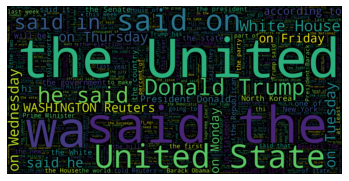

In [82]:
plot_wordcloud(true_df.text)

In [ ]:
plot_wordcloud(fake_df.text)